# **- Pipeline crack detection -**

# **crack_segmentation_train V2**

Model to detect cracks on masked pipe images.



# **0. Libraries**

### Installing libraries

In [1]:
print("Installing segmentation_models....")
!pip install segmentation_models --quiet
print("  -> segmentation_models installed!")

print("\n" + '\033[1m' + "Libraries correctly installed!" + '\033[0m')

Installing segmentation_models....
     |████████████████████████████████| 50 kB 4.0 MB/s 
  -> segmentation_models installed!

Libraries correctly installed!


### Importing libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
from datetime import datetime
import random

import matplotlib.pyplot as plt
import numpy as np

%env SM_FRAMEWORK = tf.keras
import segmentation_models as sm
from sklearn.model_selection import train_test_split

import tensorflow as tf

# from keras.preprocessing.image import ImageDataGenerator

# from patchify import patchify, unpatchify
# import tifffile as tiff

Mounted at /content/drive
env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


# **1. Auxiliar functions**

In [3]:
class printing_format:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m'

format = printing_format()

class img_storage:
  def __init__ (self, good_img, pipe_roi, crack_img, crack_pipe_roi, crack_roi):
    self.pipe_img = pipe_img
    self.pipe_roi = pipe_roi
    self.crack_img = crack_img
    self.crack_pipe_roi = crack_pipe_roi
    self.crack_roi = crack_roi

# **2. DataSet generation**

### 2.1. Import images

In [4]:
############### Stablish path ###############
%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/DataSet'
print()

img_size = 256

############### Good images ###############
print(format.bold + "Importing good pipe images...." + format.end)

path = "pipe_img"

files = os.listdir( path )
files = sorted( files )

pipe_img = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  pipe_img.append( img )

############### Pipe area ###############
print(format.bold + "Importing good pipe roi...." + format.end)

path = "pipe_roi"

files = os.listdir( path )
files = sorted(files)

pipe_roi = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  pipe_roi.append( img )

############### Cracked images ###############
print(format.bold + "Importing cracked pipe images...." + format.end)

path = "crack_img"

files = os.listdir( path )
files = sorted( files )

crack_img = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  crack_img.append( img )

############### Cracked pipe area ###############
print(format.bold + "Importing cracked pipe roi...." + format.end)

path = "cracked_pipe_roi"

files = os.listdir( path )
files = sorted(files)

crack_pipe_roi = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  crack_pipe_roi.append( img )

############### Cracked pipe area ###############
print(format.bold + "Importing cracks roi images...." + format.end)

path = "seg_train"

files = os.listdir( path )
files = sorted(files)

crack_roi = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  crack_roi.append( img )

############### Generate arrays ###############
pipe_img = np.array(pipe_img)
pipe_roi= np.array(pipe_roi)
crack_img      = np.array(crack_img)
crack_pipe_roi = np.array(crack_pipe_roi)
crack_roi = np.array(crack_roi)


/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/DataSet

Importing good pipe images....
Importing good pipe roi....
Importing cracked pipe images....
Importing cracked pipe roi....
Importing cracks roi images....


In [5]:
############### Storage images ###############
saved = img_storage(pipe_img, pipe_roi, crack_img, crack_pipe_roi, crack_roi)

		-- IMAGES --
  Pipe images:  	(199, 256, 256)
  Pipe ROI:     	(199, 256, 256)

Index: 159


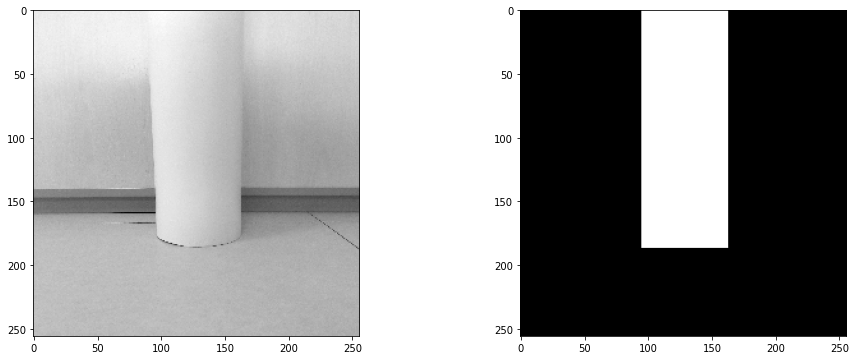

Index: 61


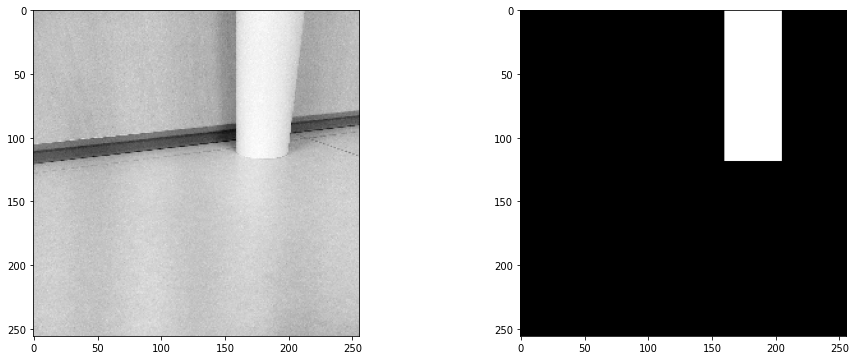

In [6]:
# Display data shape
print(format.bold + "\t\t-- IMAGES --" + format.end)
print("  Pipe images:  \t" + str( saved.pipe_img.shape ) )
print("  Pipe ROI:     \t" + str( saved.pipe_roi.shape ) )
print()

for i in range(2):

  index = random.randint(0, len(pipe_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  plt.imshow( pipe_img[index], cmap = "gray")
  plt.subplot(122)
  plt.imshow( pipe_roi[index], cmap = "gray")
  plt.show()

		-- IMAGES --
  Crack images:   	(121, 256, 256)
  Crack pipe ROI: 	(121, 256, 256)

Index: 8


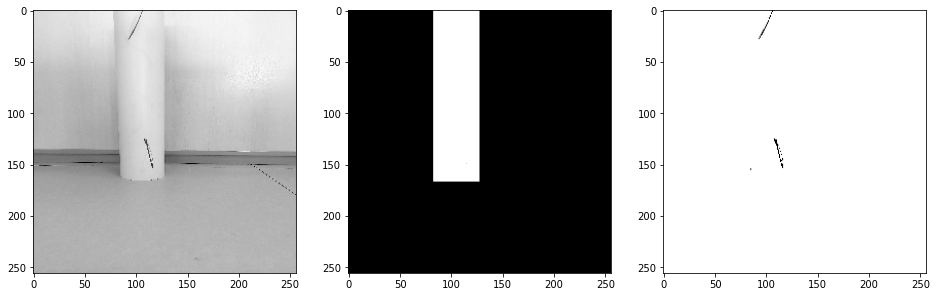

Index: 47


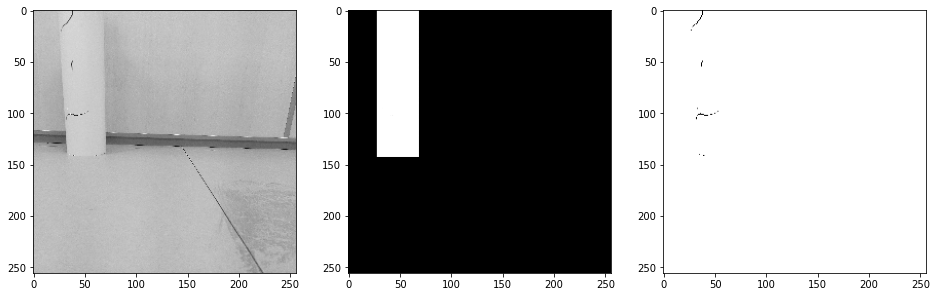

In [7]:
# Display data shape
print(format.bold + "\t\t-- IMAGES --" + format.end)
print("  Crack images:   \t" + str( saved.crack_img.shape ) )
print("  Crack pipe ROI: \t" + str( saved.crack_pipe_roi.shape ) )
print()

for i in range(2):

  index = random.randint(0, len(crack_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(131)
  plt.imshow( crack_img[index], cmap = "gray")
  plt.subplot(132)
  plt.imshow( crack_pipe_roi[index], cmap = "gray")
  plt.subplot(133)
  plt.imshow( crack_roi[index], cmap = "gray")
  plt.show()

### 2.2. Normalize values

In [25]:
pipe_img       = saved.pipe_img
pipe_roi       = saved.pipe_roi
crack_img      = saved.crack_img
crack_pipe_roi = saved.crack_pipe_roi
crack_roi      = saved.crack_roi

# Data shape and type
print(format.bold + "Splited data:" + format.end)
print("  Pipe images:    \t" + str( pipe_img.shape ) + "\t - " + str( pipe_img.dtype ) )
print("  Pipe ROI:       \t" + str( pipe_roi.shape ) + "\t - " + str( pipe_roi.dtype ) )
print("  Crack images:   \t" + str( crack_img.shape ) + "\t - " + str( crack_img.dtype ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi.shape ) + "\t - " + str( crack_pipe_roi.dtype ) )
print("  Crack ROI:      \t" + str( crack_roi.shape ) + "\t - " + str( crack_roi.dtype ) )
print()

# Data range
index = random.randint(0, len(crack_img) - 1)
print(format.bold + "Max-Min (" + str(index) + "):" + format.end)
print("  Pipe images:    \t" + str( pipe_img[index, :, :].min() ) + "\t-\t"  + str( pipe_img[index, :, :].max() ) )
print("  Pipe ROI:       \t" + str( pipe_roi[index, :, :].min() ) + "\t-\t"  + str( pipe_roi[index, :, :].max() ) )
print("  Crack images:   \t" + str( crack_img[index, :, :].min() ) + "\t-\t"  + str( crack_img[index, :, :].max() ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi[index, :, :].min() ) + "\t-\t"  + str( crack_pipe_roi[index, :, :].max() ) )
print("  Crack ROI:      \t" + str( crack_roi[index, :, :].min() ) + "\t-\t"  + str( crack_roi[index, :, :].max() ) )
print()

# Data normalization
print(format.bold + "Starting data normalization...." + format.end)

for i in range( pipe_img.shape[0] ):

  pipe_img[index] = pipe_img[index] - pipe_img[index].min()
  pipe_img[index] = pipe_img[index] / pipe_img[index].max()

  crack_img[index] = crack_img[index] - crack_img[index].min()
  crack_img[index] = crack_img[index] / crack_img[index].max()

pipe_roi       = pipe_roi > 20
crack_pipe_roi = crack_pipe_roi > 20
crack_roi      = crack_roi > 20

# Data type selection
data_type = "float32"
pipe_img       = pipe_img.astype( data_type )
pipe_roi       = pipe_roi.astype( data_type )
crack_img      = crack_img.astype( data_type )
crack_pipe_roi = crack_pipe_roi.astype( data_type )
crack_roi      =crack_roi.astype( data_type )

print("  -> Data normalization finished!\n")

# New data shape and type
print(format.bold + "Splited data:" + format.end)
print("  Pipe images:    \t" + str( pipe_img.shape ) + "\t - " + str( pipe_img.dtype ) )
print("  Pipe ROI:       \t" + str( pipe_roi.shape ) + "\t - " + str( pipe_roi.dtype ) )
print("  Crack images:   \t" + str( crack_img.shape ) + "\t - " + str( crack_img.dtype ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi.shape ) + "\t - " + str( crack_pipe_roi.dtype ) )
print("  Crack pipe ROI: \t" + str( crack_roi.shape ) + "\t - " + str( crack_roi.dtype ) )
print()

# New data range
print(format.bold + "Max-Min (" + str(index) + "):" + format.end)
print("  Pipe images:    \t" + str( pipe_img[index, :, :].min() ) + "\t-\t"  + str( pipe_img[index, :, :].max() ) )
print("  Pipe ROI:       \t" + str( pipe_roi[index, :, :].min() ) + "\t-\t"  + str( pipe_roi[index, :, :].max() ) )
print("  Crack images:   \t" + str( crack_img[index, :, :].min() ) + "\t-\t"  + str( crack_img[index, :, :].max() ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi[index, :, :].min() ) + "\t-\t"  + str( crack_pipe_roi[index, :, :].max() ) )
print("  Crack ROI:      \t" + str( crack_roi[index, :, :].min() ) + "\t-\t"  + str( crack_roi[index, :, :].max() ) )
print()

Splited data:
  Pipe images:    	(199, 256, 256)	 - uint8
  Pipe ROI:       	(199, 256, 256)	 - uint8
  Crack images:   	(121, 256, 256)	 - uint8
  Crack pipe ROI: 	(121, 256, 256)	 - uint8
  Crack ROI:      	(121, 256, 256)	 - uint8

Max-Min (73):
  Pipe images:    	1	-	249
  Pipe ROI:       	0	-	255
  Crack images:   	1	-	200
  Crack pipe ROI: 	0	-	255
  Crack ROI:      	0	-	255

Starting data normalization....
  -> Data normalization finished!

Splited data:
  Pipe images:    	(199, 256, 256)	 - float32
  Pipe ROI:       	(199, 256, 256)	 - float32
  Crack images:   	(121, 256, 256)	 - float32
  Crack pipe ROI: 	(121, 256, 256)	 - float32
  Crack pipe ROI: 	(121, 256, 256)	 - float32

Max-Min (73):
  Pipe images:    	0.0	-	1.0
  Pipe ROI:       	0.0	-	1.0
  Crack images:   	0.0	-	1.0
  Crack pipe ROI: 	0.0	-	1.0
  Crack ROI:      	0.0	-	1.0



Index: 174


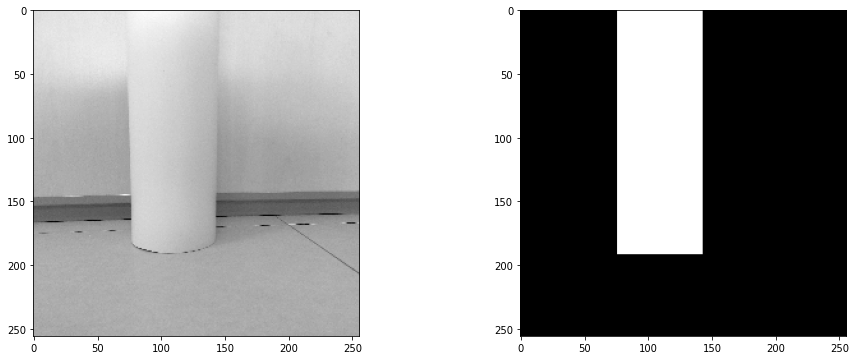

Index: 132


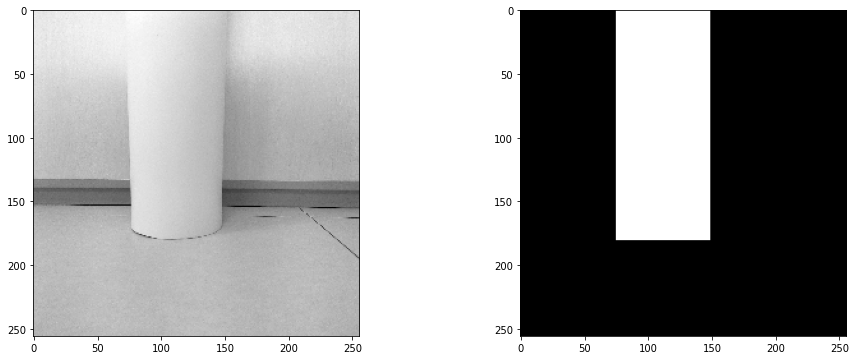

In [26]:
for i in range(2):

  index = random.randint(0, len(pipe_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  plt.imshow( pipe_img[index], cmap = "gray")
  plt.subplot(122)
  plt.imshow( pipe_roi[index], cmap = "gray")
  plt.show()

Index: 38


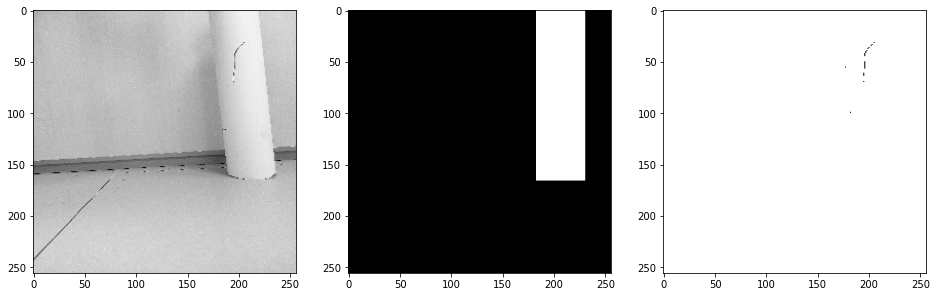

Index: 11


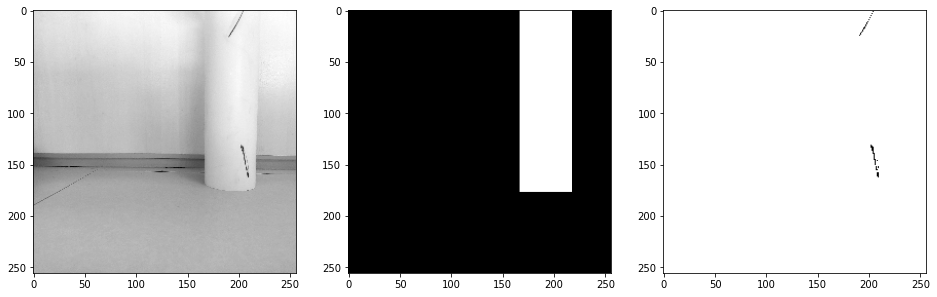

In [27]:
for i in range(2):

  index = random.randint(0, len(crack_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(131)
  plt.imshow( crack_img[index], cmap = "gray")
  plt.subplot(132)
  plt.imshow( crack_pipe_roi[index], cmap = "gray")
  plt.subplot(133)
  plt.imshow( crack_roi[index], cmap = "gray")
  plt.show()

### 2.3. Clone layers

In [28]:
x1 = np.zeros( (pipe_img.shape[0], pipe_img.shape[1], pipe_img.shape[2], 3), dtype = data_type )
x2 = np.zeros( (crack_img.shape[0], crack_img.shape[1], crack_img.shape[2], 3), dtype = data_type )

x1[:, :, :, 0] = pipe_img[:, :, :]
x1[:, :, :, 1] = pipe_img[:, :, :]
x1[:, :, :, 2] = pipe_img[:, :, :]

x2[:, :, :, 0] = crack_img[:, :, :]
x2[:, :, :, 1] = crack_img[:, :, :]
x2[:, :, :, 2] = crack_img[:, :, :]

pipe_img  = x1
crack_img = x2

print(format.bold + "Pipe images:  " + format.end + str( pipe_img.shape ))
print(format.bold + "Crack images: " + format.end + str( crack_img.shape ))
print
print(format.bold + "Pipe images:   " + format.end + str( pipe_img[:, :, :].min() ) + "\t-\t"  + str( pipe_img[:, :, :].max() ) )
print(format.bold + "Crack images:  " + format.end + str( crack_img[:, :, :].min() ) + "\t-\t"  + str( crack_img[:, :, :].max() ) )

Pipe images:  (199, 256, 256, 3)
Crack images: (121, 256, 256, 3)
Pipe images:   0.0	-	251.0
Crack images:  0.0	-	249.0


# **3. Masking the images**

In [29]:
images = np.concatenate( (pipe_img, crack_img) )
images = images / 255
images.astype( data_type )
mask   = np.concatenate( (pipe_roi, crack_pipe_roi), dtype = data_type )
ds_x = np.zeros( images.shape ) + 1

print(format.bold + "Images:  " + format.end + str( images.shape ) + "\t - " + str( images.dtype ) )
print(format.bold + "Masks:   " + format.end + str( mask.shape ) + "\t - " + str( mask.dtype ) )
print(format.bold + "Croped:  " + format.end + str( ds_x.shape ) + "\t - " + str( ds_x.dtype ) )
print()
print(format.bold + "Images:  " + format.end + str( images[:, :, :].min() ) + "\t-\t"  + str( images[:, :, :].max() ) )
print(format.bold + "Masks:   " + format.end + str( mask[:, :, :].min() ) + "\t-\t"  + str( mask[:, :, :].max() ) )
print(format.bold + "Croped:  " + format.end + str( ds_x[:, :, :].min() ) + "\t-\t"  + str( ds_x[:, :, :].max() ) )

Images:  (320, 256, 256, 3)	 - float32
Masks:   (320, 256, 256)	 - float32
Croped:  (320, 256, 256, 3)	 - float64

Images:  0.0	-	0.9843137
Masks:   0.0	-	1.0
Croped:  1.0	-	1.0


In [30]:
size = ds_x.shape

for img in range( size[0] ):
  for i in range( size[1] ):
    for j in range( size[2] ):
      if mask[img, i, j] > 0.2:
        ds_x[img, i, j, :] = images[img, i, j, :]

Index: 193


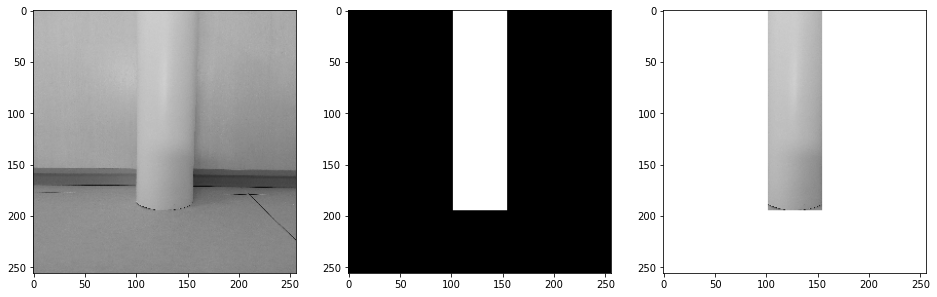

Index: 72


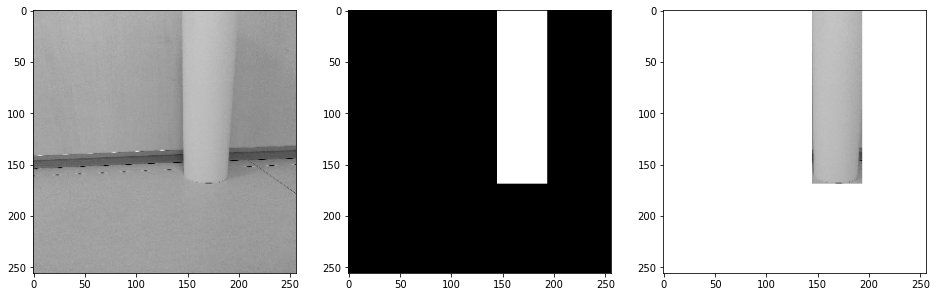

Index: 203


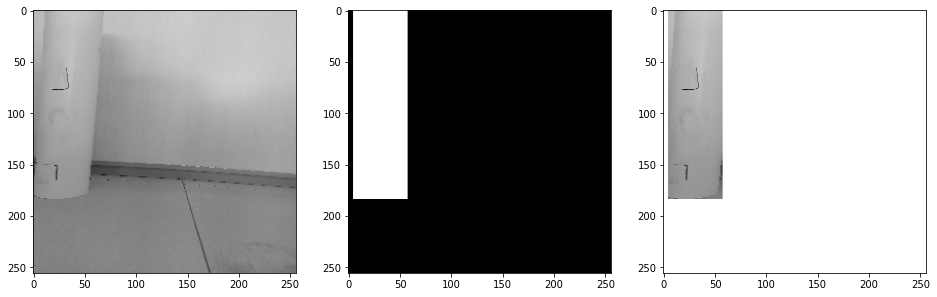

Index: 101


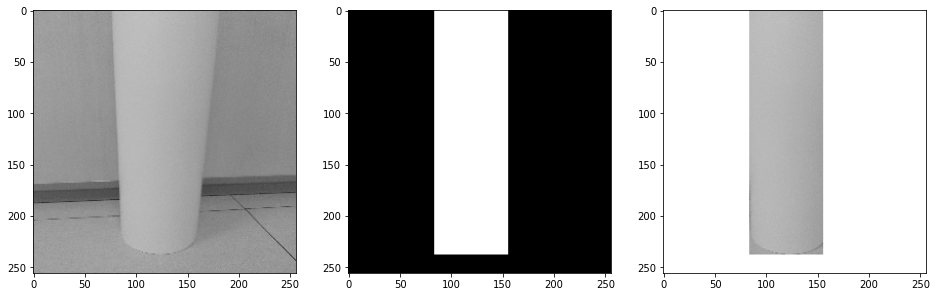

Index: 209


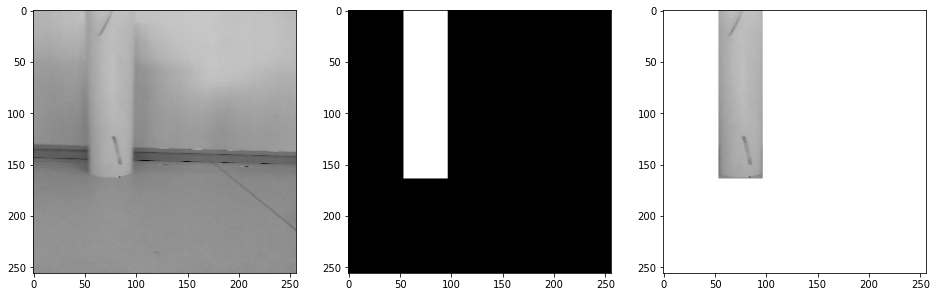

Index: 242


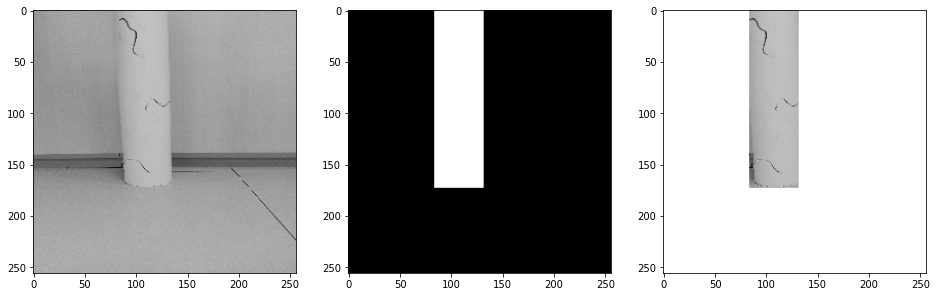

Index: 155


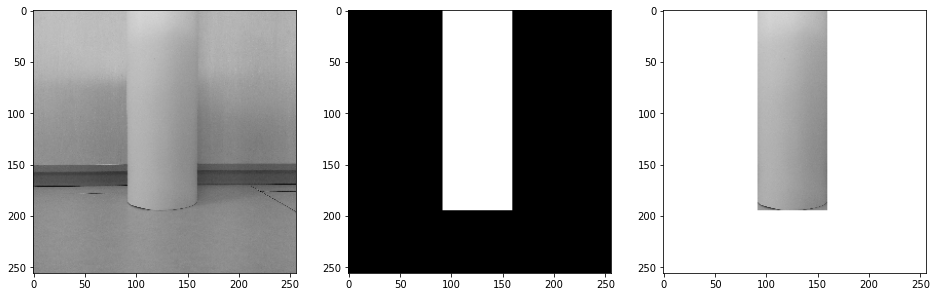

Index: 303


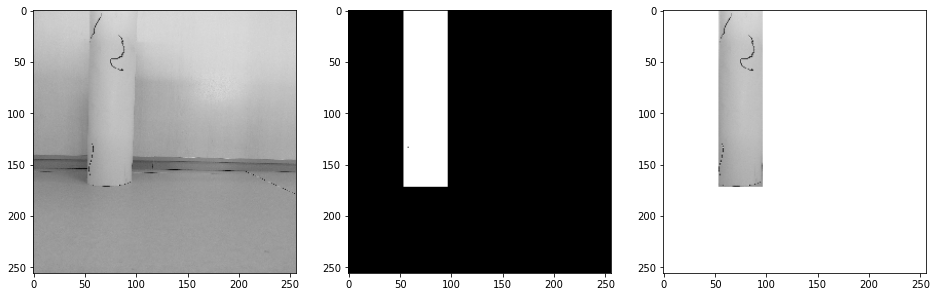

Index: 29


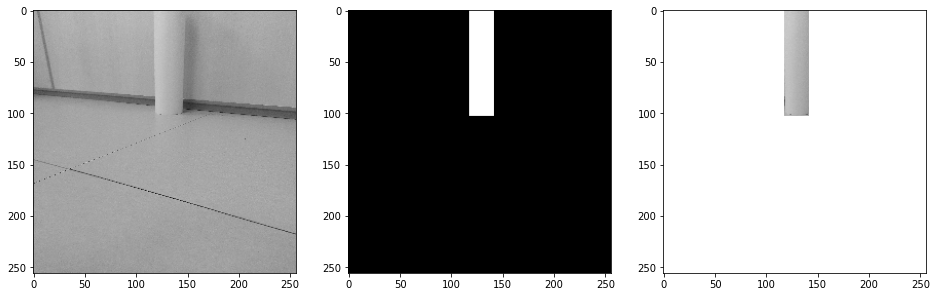

Index: 71


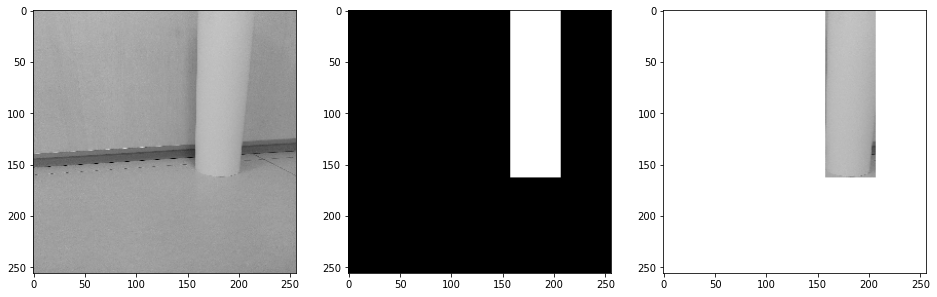

Index: 308


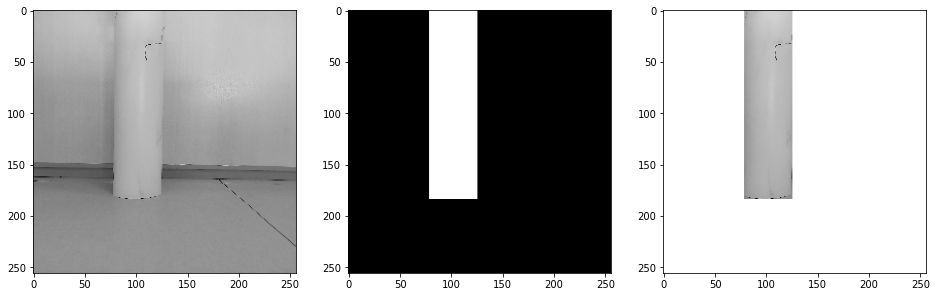

Index: 16


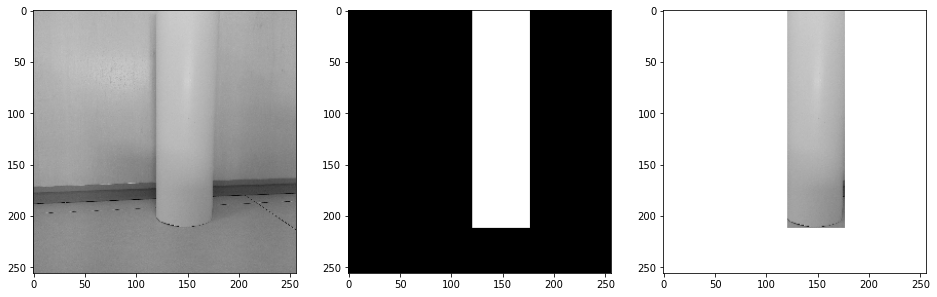

Index: 247


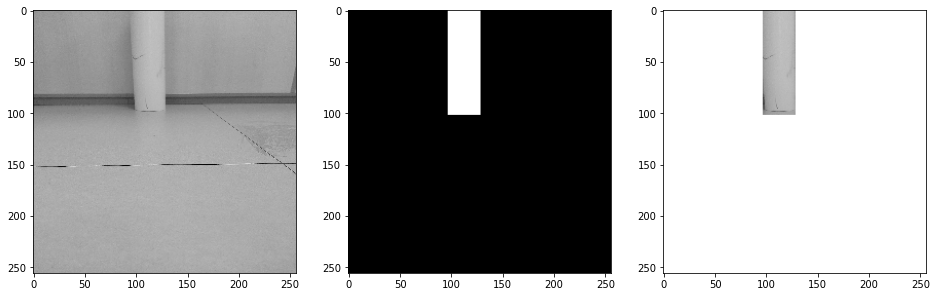

Index: 99


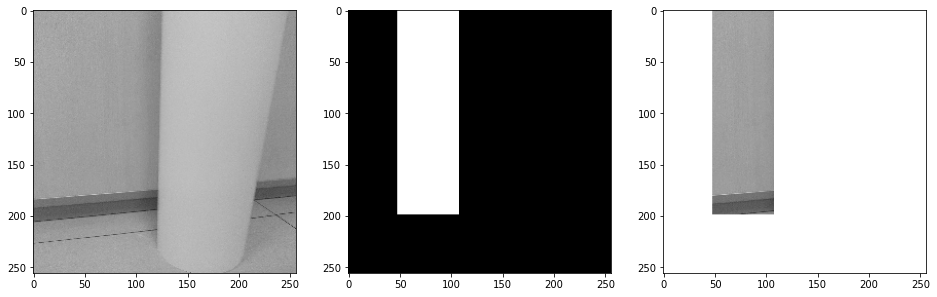

Index: 172


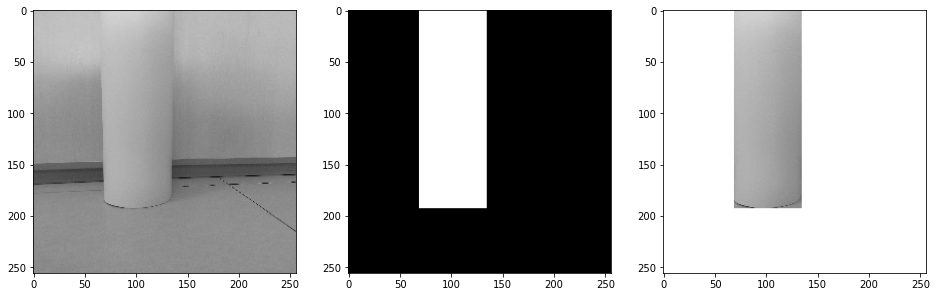

Index: 315


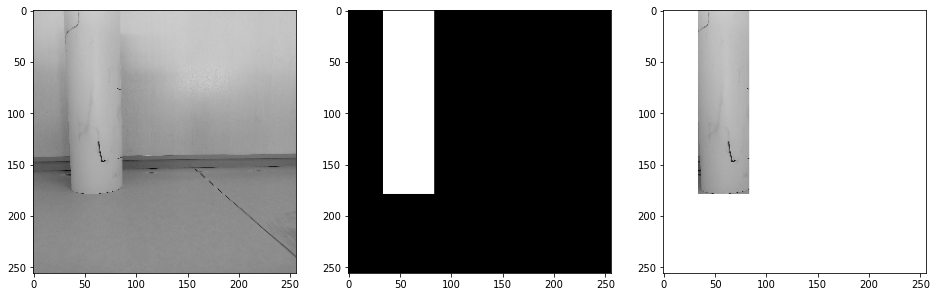

Index: 27


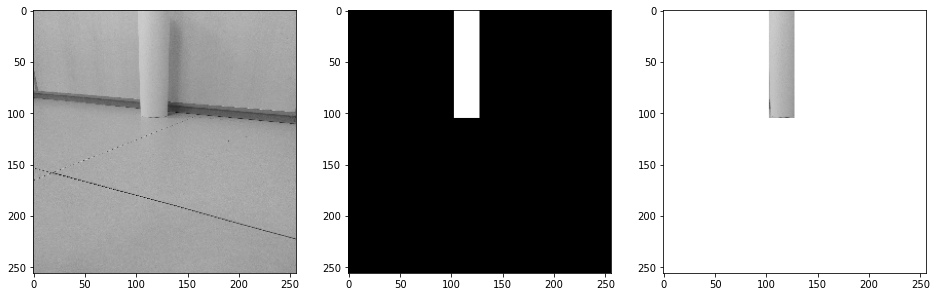

Index: 207


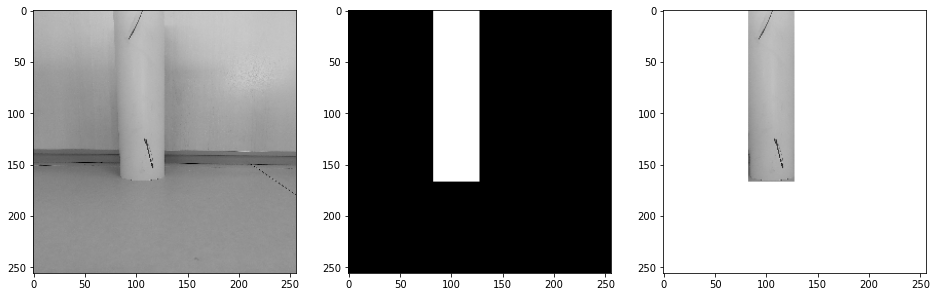

Index: 130


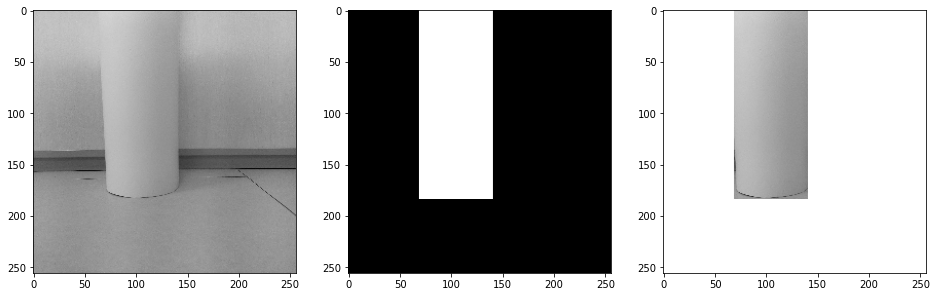

Index: 207


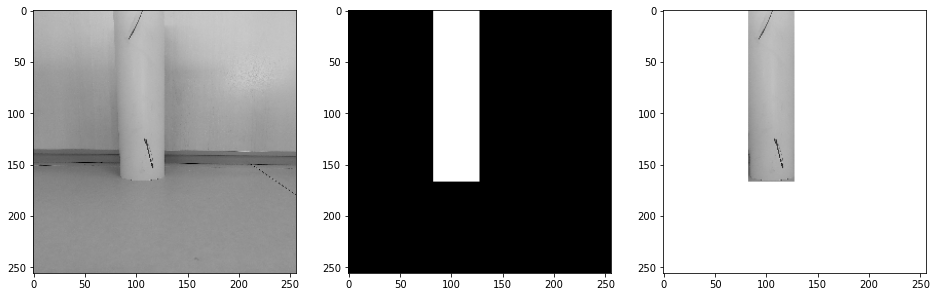

In [31]:
for i in range(20):

  index = random.randint(0, len(images) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(131)
  plt.imshow( images[index], cmap = "gray")
  plt.subplot(132)
  plt.imshow( mask[index], cmap = "gray")
  plt.subplot(133)
  plt.imshow( ds_x[index], cmap = "gray")
  plt.show()

In [32]:
y1 = np.zeros( pipe_roi.shape )
y1 = y1 + 1;
y1 = y1.astype( data_type )

ds_y = np.concatenate( (y1, crack_roi), dtype = data_type)

ds_x = ds_x.astype(data_type)

Index: 240


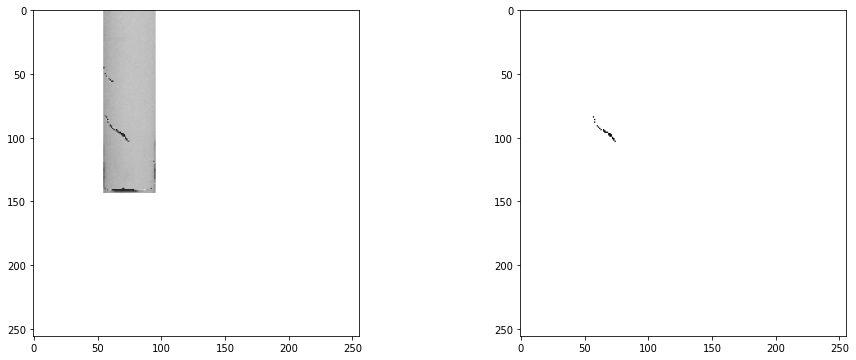

Index: 290


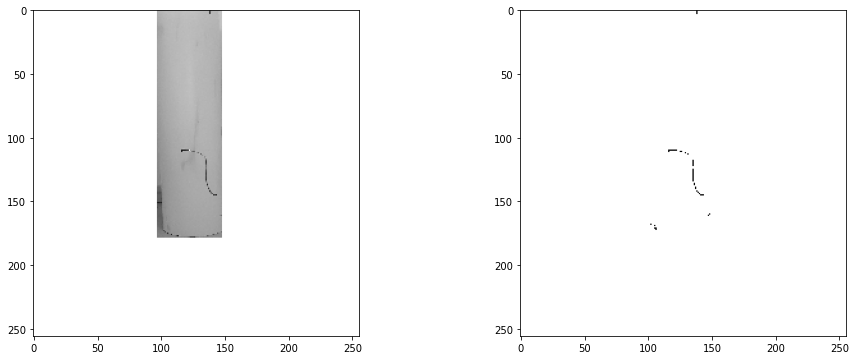

Index: 15


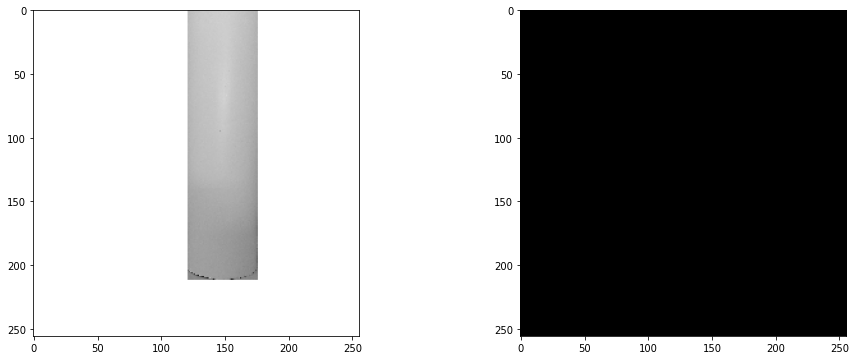

Index: 31


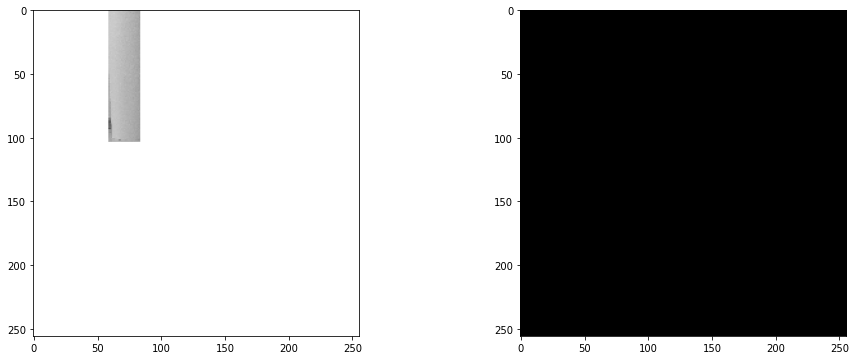

Index: 66


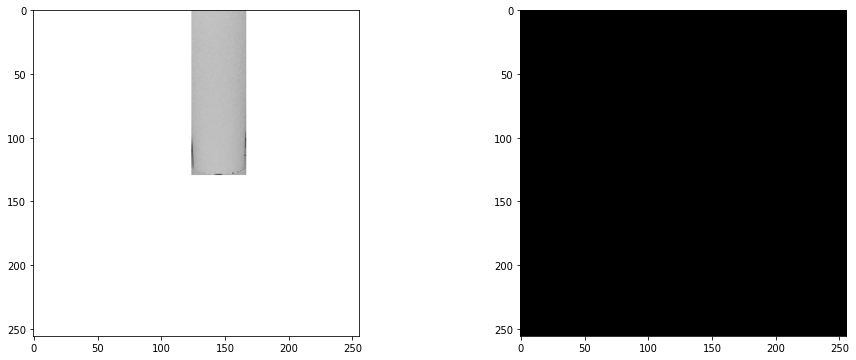

Index: 54


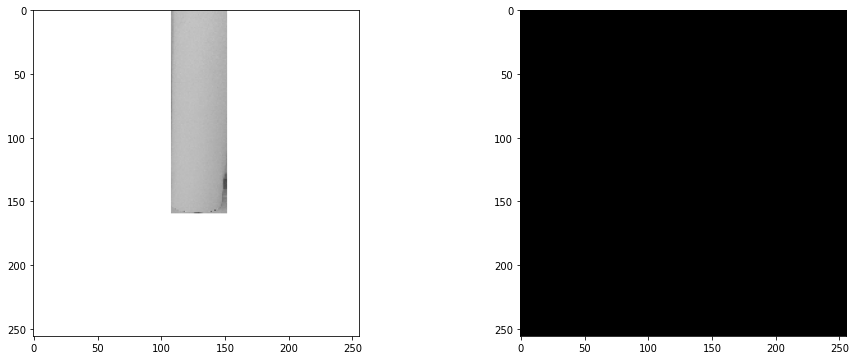

Index: 266


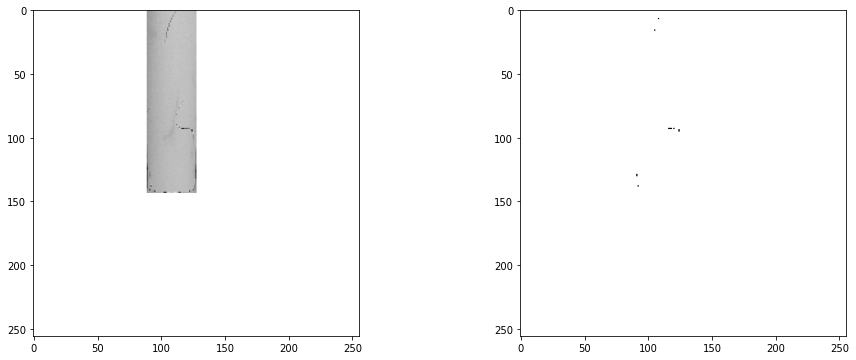

Index: 183


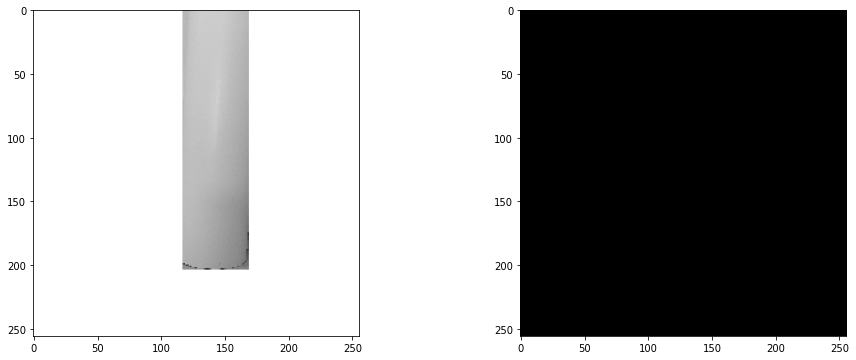

Index: 318


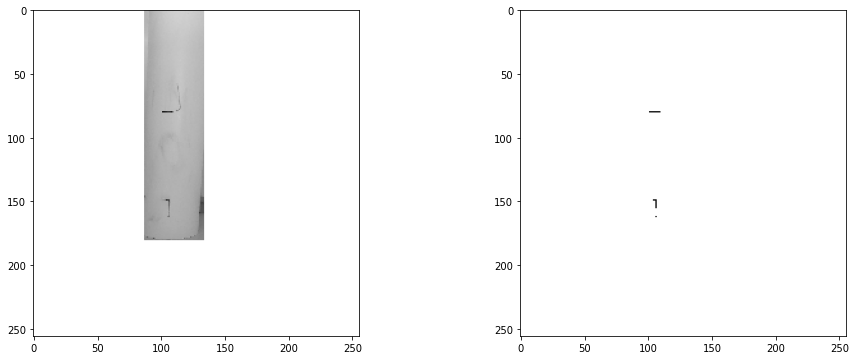

Index: 237


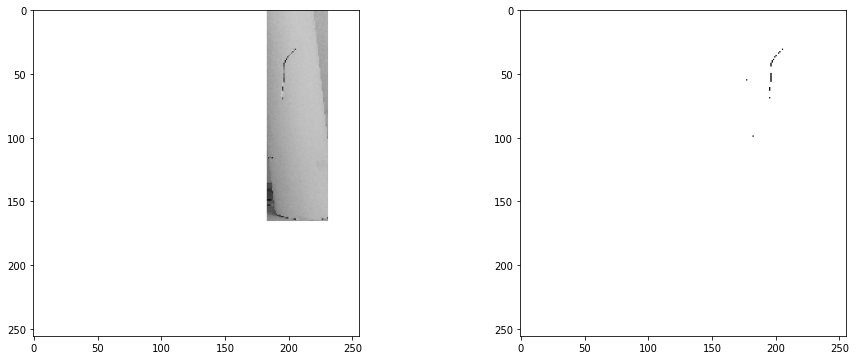

In [33]:
for i in range(10):

  index = random.randint(0, len(ds_x) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  plt.imshow( ds_x[index], cmap = "gray")
  plt.subplot(122)
  plt.imshow( ds_y[index], cmap = "gray")
  plt.show()

In [34]:
print(format.bold + "Dataset X:  " + format.end + str( ds_x.shape ) + "\t - " + str( ds_x.dtype ) )
print(format.bold + "Dataset Y:  " + format.end + str( ds_y.shape ) + "\t - " + str( ds_y.dtype ) )
print()
print(format.bold + "Dataset X:  " + format.end + str( ds_x[:, :, :].min() ) + "\t-\t"  + str( ds_x[:, :, :].max() ) )
print(format.bold + "Dataset Y:  " + format.end + str( ds_y[:, :, :].min() ) + "\t-\t"  + str( ds_y[:, :, :].max() ) )

Dataset X:  (320, 256, 256, 3)	 - float32
Dataset Y:  (320, 256, 256)	 - float32

Dataset X:  0.0	-	1.0
Dataset Y:  0.0	-	1.0


# **4. Define UNET model**

In [35]:
# Split data
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(ds_x, ds_y, test_size = test_size, random_state = 0)

print(format.bold + "Splited data:" + format.end)
print("  x_train: \t" + str( x_train.shape ) + "\t - " + str( x_train.dtype ) )
print("  y_train: \t" + str( y_train.shape ) + "\t\t - " + str( y_train.dtype ) )
print("  x_test:  \t" + str( x_test.shape ) + "\t - " + str( x_test.dtype ) )
print("  y_test:  \t" + str( y_test.shape ) + "\t\t - " + str( y_test.dtype ) )
print()
print(format.bold + "Dataset X1:  " + format.end + str( x_train[:, :, :].min() ) + "\t-\t"  + str( x_train[:, :, :].max() ) )
print(format.bold + "Dataset X2:  " + format.end + str( y_train[:, :, :].min() ) + "\t-\t"  + str( y_train[:, :, :].max() ) )
print(format.bold + "Dataset Y1:  " + format.end + str( x_test[:, :, :].min() ) + "\t-\t"  + str( x_test[:, :, :].max() ) )
print(format.bold + "Dataset Y2:  " + format.end + str( y_test[:, :, :].min() ) + "\t-\t"  + str( y_test[:, :, :].max() ) )

Splited data:
  x_train: 	(288, 256, 256, 3)	 - float32
  y_train: 	(288, 256, 256)		 - float32
  x_test:  	(32, 256, 256, 3)	 - float32
  y_test:  	(32, 256, 256)		 - float32

Dataset X1:  0.0	-	1.0
Dataset X2:  0.0	-	1.0
Dataset Y1:  0.0	-	1.0
Dataset Y2:  0.0	-	1.0


### 4.1. Trainning the model

In [36]:
%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/model_data'

def f1(y_true, y_pred):
  print(format.bold + "Entering f1...." + format.end)
  metric = tfa.metrics.F1Score(num_classes=3, threshold=0.5)
  metric.update_state(y_true, y_pred)
  return metric.result()


model_name = "crack_segmentation_V1"
model = tf.keras.models.load_model( model_name, compile=False, custom_objects={'f1': f1})

/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/model_data


### 4.2. Check results

In [37]:
for i in range( x_test.shape[3] ):
  print(format.bold + "x_test[" + str(i) + "]\t " + format.end + str( x_test[ :, :, :, i].min() ) + " - " + str( x_test[ :, :, :, i].max() ) )

x_test[0]	 0.0 - 1.0
x_test[1]	 0.0 - 1.0
x_test[2]	 0.0 - 1.0


In [38]:
prediction = model.predict( x_test )
prediction = prediction[:, :, :, 0]

print(format.bold + "Images format:" + format.end)
print("  Image:   \t " + str(x_test.shape) + "\t - " + str( x_test.dtype ) )
print("  ROI:     \t " + str(y_test.shape) + "\t\t - " + str( y_test.dtype ) )
print("  Predict: \t " + str(prediction.shape) + "\t\t - " + str( y_test.dtype ) )
print()
print(format.bold + "Images range:" + format.end)
print("  Image:   \t " + str( x_test[:, :, :].min() ) + "\t-\t"  + str( x_test[:, :, :].max() ) )
print("  ROI:     \t " + str( y_test[:, :, :].min() ) + "\t-\t"  + str( y_test[:, :, :].max() ) )
print("  Predict: \t " + str( prediction[:, :, :].min() ) + "\t-\t"  + str( prediction[:, :, :].max() ) )

Images format:
  Image:   	 (32, 256, 256, 3)	 - float32
  ROI:     	 (32, 256, 256)		 - float32
  Predict: 	 (32, 256, 256)		 - float32

Images range:
  Image:   	 0.0	-	1.0
  ROI:     	 0.0	-	1.0
  Predict: 	 7.5598416e-11	-	1.0


0. Index:  0


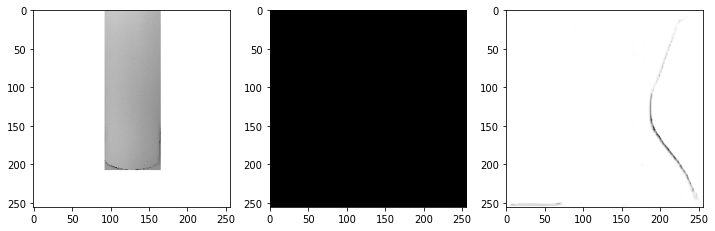

1. Index:  1


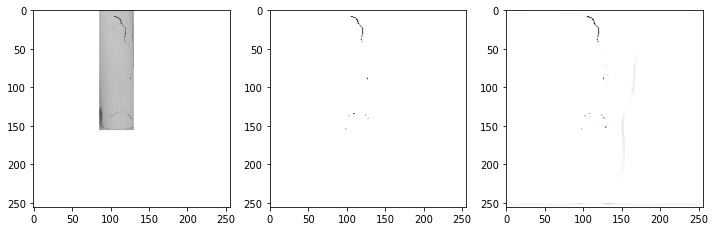

2. Index:  2


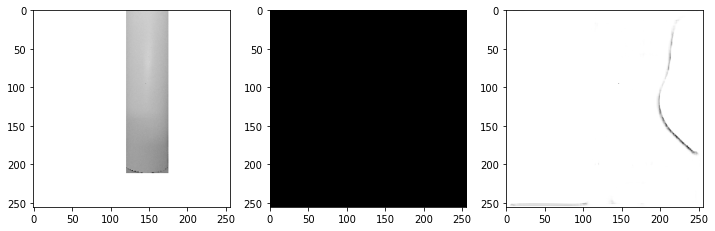

3. Index:  3


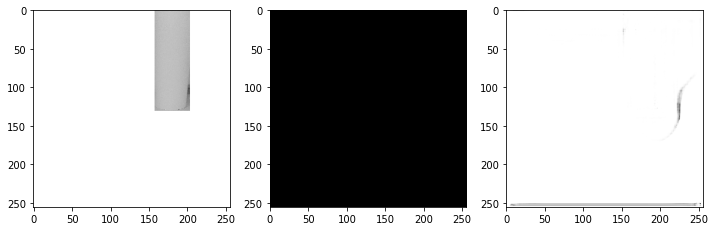

4. Index:  4


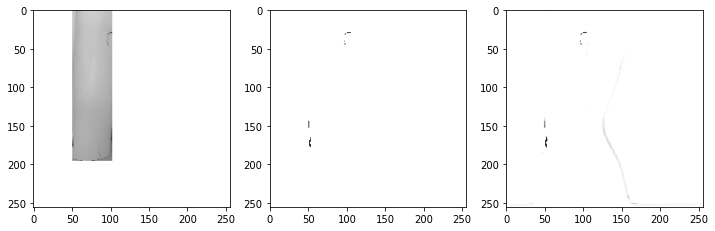

5. Index:  5


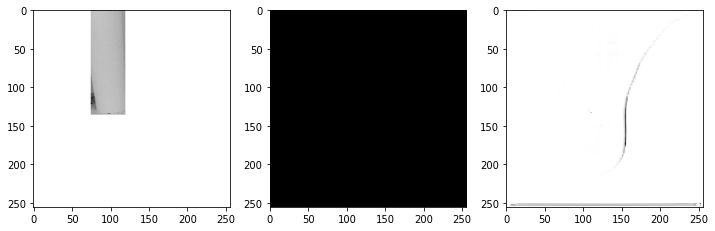

6. Index:  6


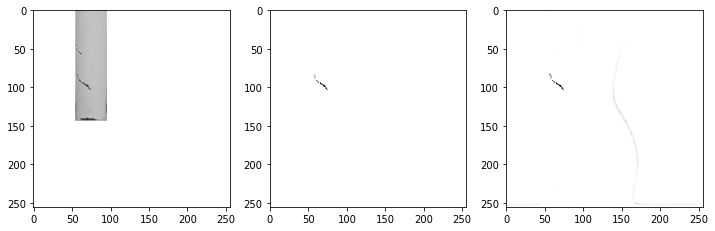

7. Index:  7


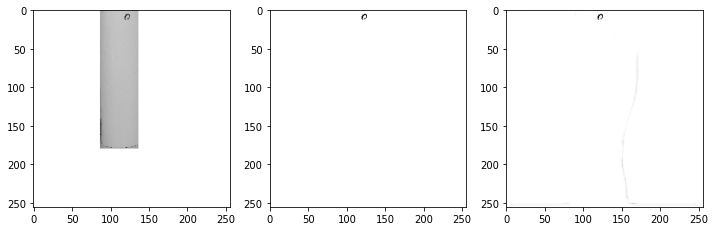

8. Index:  8


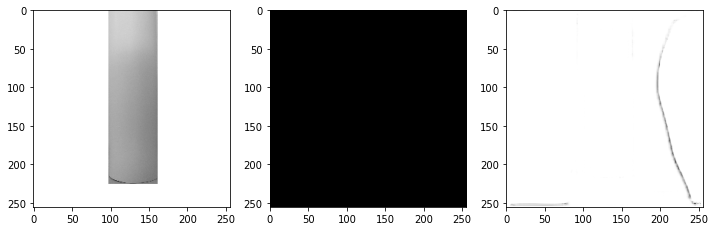

9. Index:  9


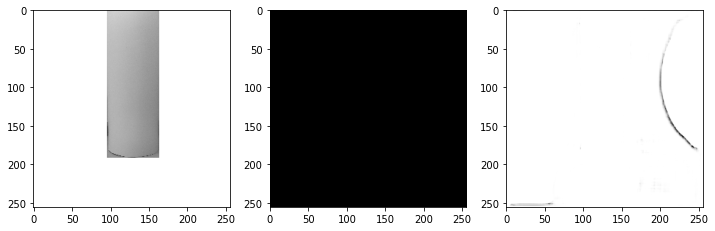

10. Index:  10


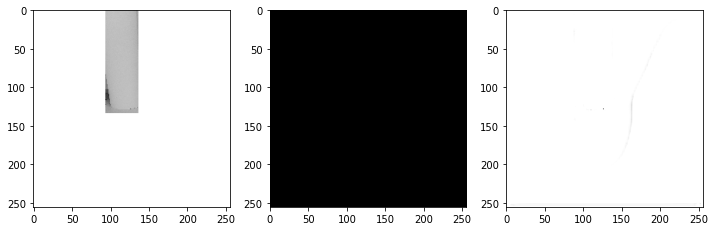

11. Index:  11


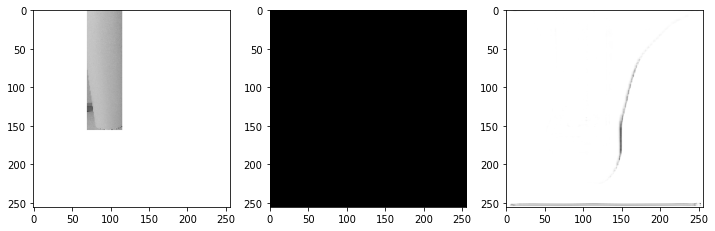

12. Index:  12


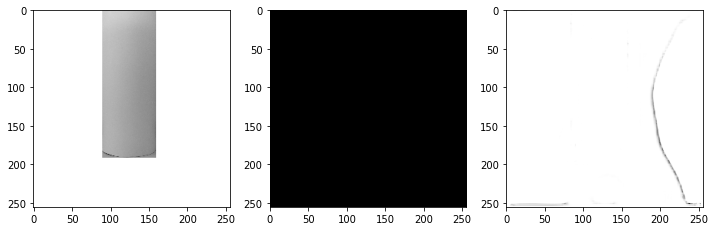

13. Index:  13


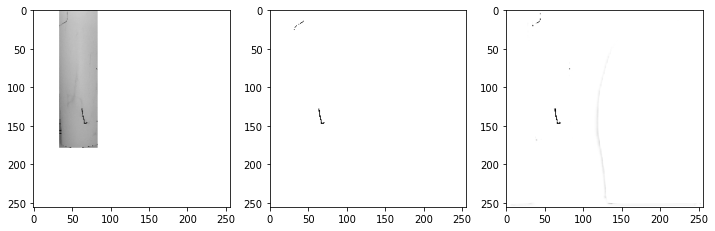

14. Index:  14


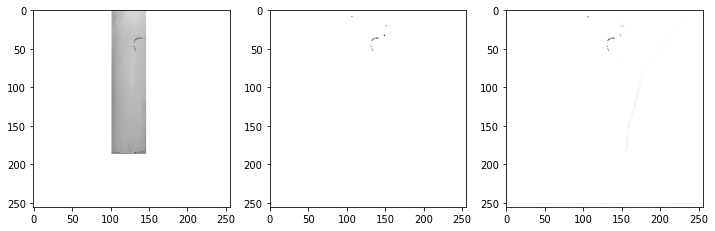

15. Index:  15


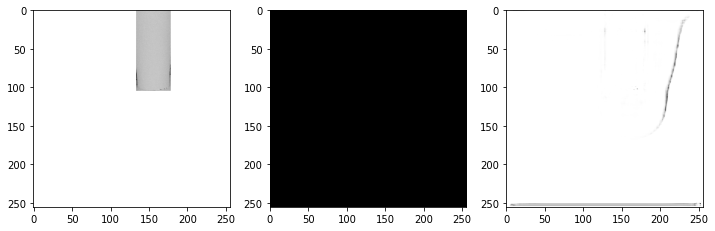

16. Index:  16


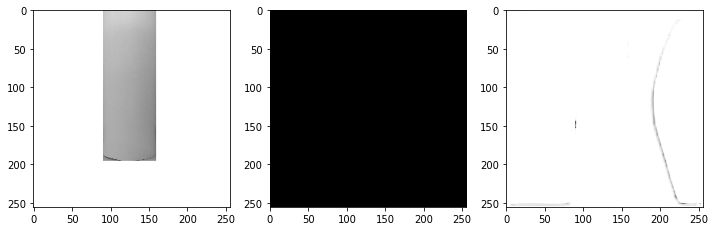

17. Index:  17


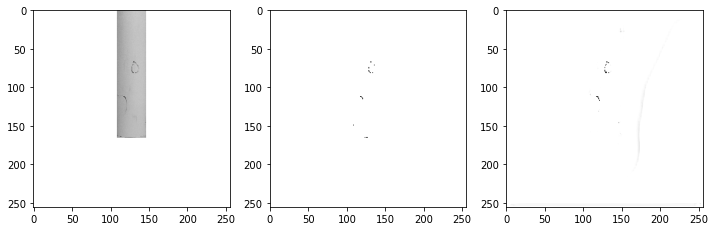

18. Index:  18


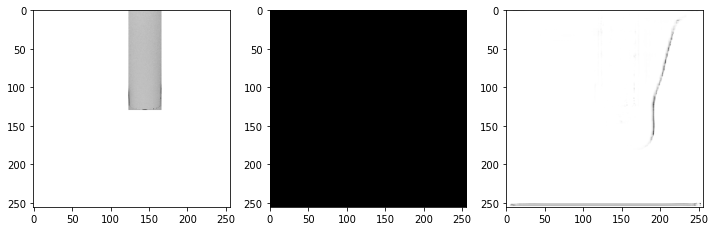

19. Index:  19


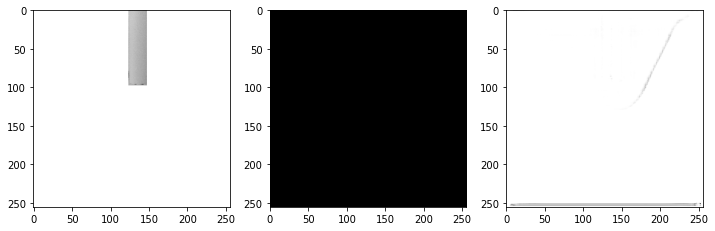

20. Index:  20


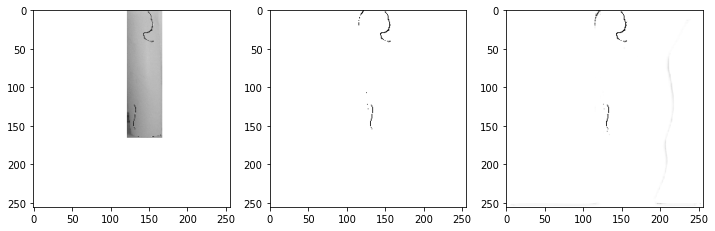

21. Index:  21


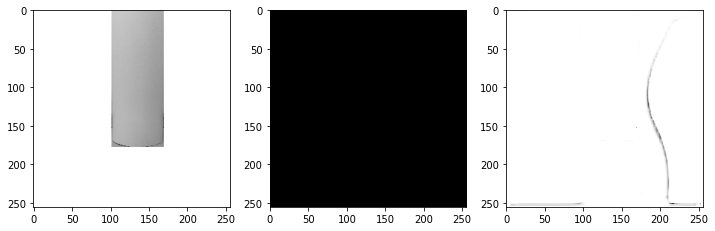

22. Index:  22


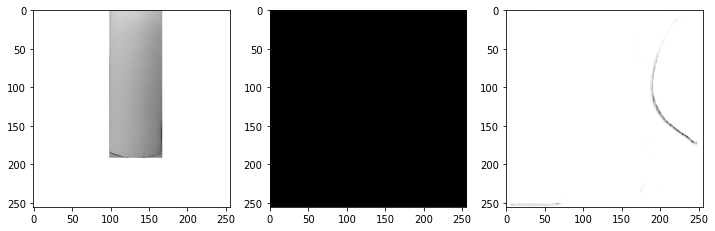

23. Index:  23


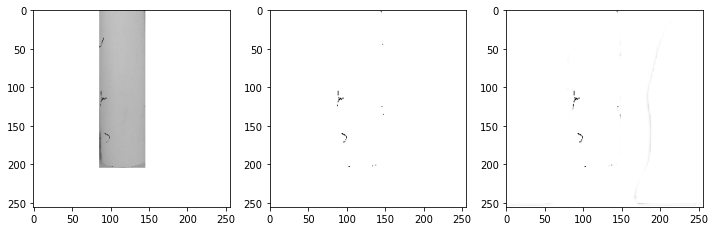

24. Index:  24


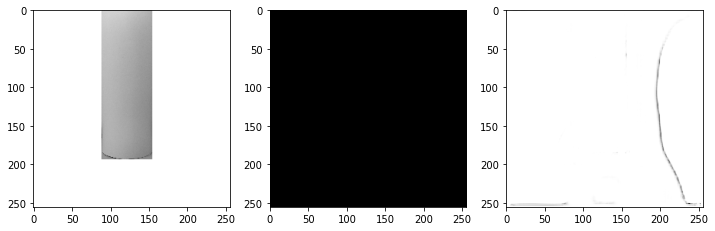

25. Index:  25


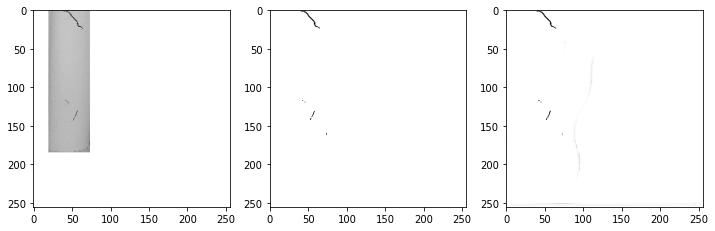

26. Index:  26


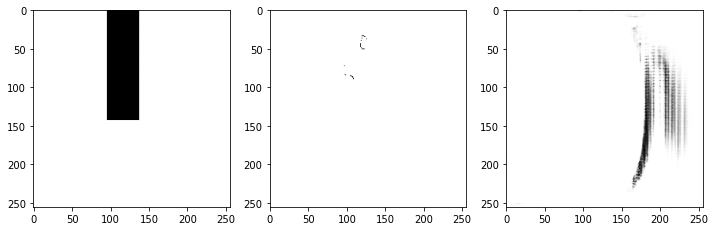

27. Index:  27


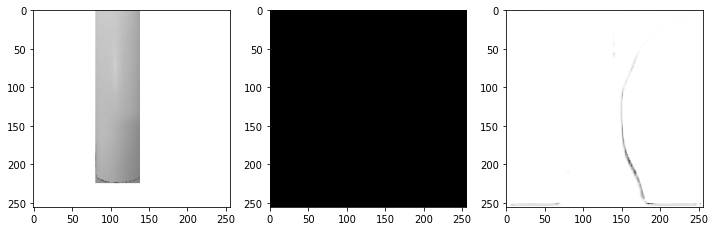

28. Index:  28


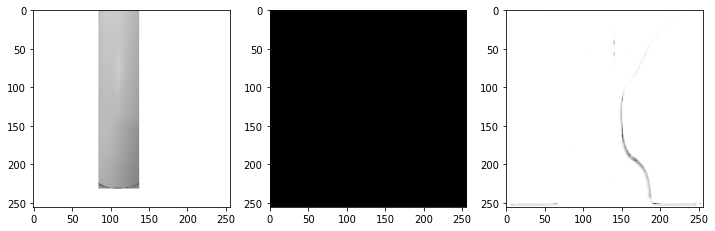

29. Index:  29


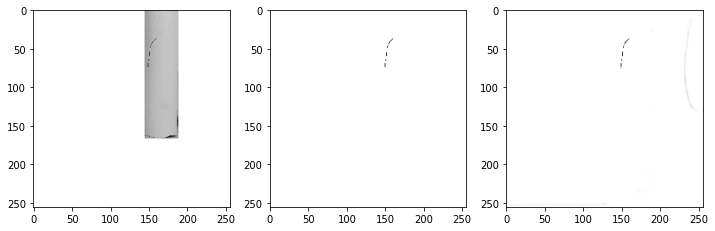

30. Index:  30


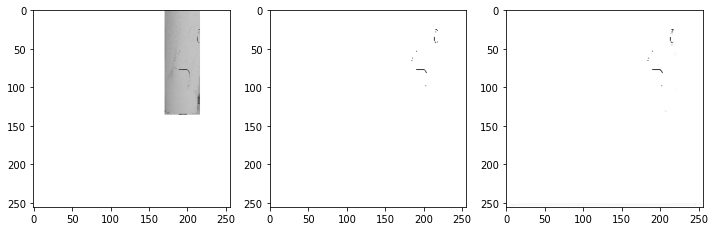

31. Index:  31


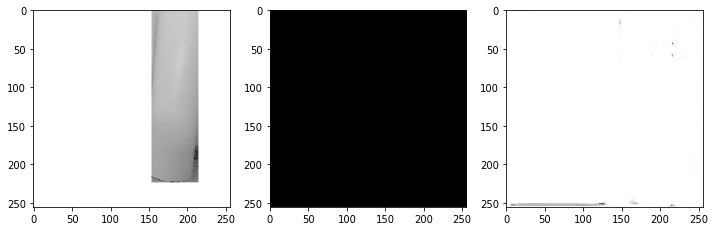

In [39]:
for i in range( len(x_test) ):

  index = i

  print(format.bold + str(i) + ". Index:  " + format.end + str(index))
  plt.figure(figsize=(12, 6))
  plt.subplot(131)
  plt.imshow( x_test[index], cmap = "gray")
  plt.subplot(132)
  plt.imshow( y_test[index], cmap = "gray")
  plt.subplot(133)
  plt.imshow( prediction[index], cmap = "gray" )
  plt.show()